In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf

# First task

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("../data/Adult/adult_classification.csv")

X = data.iloc[0:5000,0:36]

Y = data.iloc[0:5000,36]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape

(4000, 36)

In [ ]:
data.head()

index  Age  Workclass_0  Workclass_1  Workclass_2  Workclass_3  Fnlwgt  \
0      0   39            0            0            0            1   77516   
1      1   50            0            0            1            0   83311   
2      2   38            0            0            1            1  215646   
3      3   53            0            0            1            1  234721   
4      4   28            0            0            1            1  338409   

   Education_0  Education_1  Education_2  ...  Capital-gain  Capital-loss  \
0            0            0            0  ...          2174             0   
1            0            0            0  ...             0             0   
2            0            0            0  ...             0             0   
3            0            0            0  ...             0             0   
4            0            0            0  ...             0             0   

   Hours-per-week  Native-country_0  Native-country_1  Native-country_2  \
0              40                 0                 0                 0   
1              13                 0                 0                 0   
2              40                 0                 0                 0   
3              40                 0                 0                 0   
4              40                 0                 0                 0   

   Native-country_3  Native-country_4  Native-country_5  Wage  
0                 0                 0                 1     0  
1                 0                 0                 1     0  
2                 0                 0                 1     0  
3                 0                 0                 1     0  
4                 0                 1                 0     0  

[5 rows x 38 columns]

 ## Classification

First

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(36, input_dim=36, activation='relu'))
model.add(Dense(36, input_dim=36, activation='sigmoid'))
model.add(Dense(1, activation='relu'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 36)                1332      
                                                                 
 dense_4 (Dense)             (None, 36)                1332      
                                                                 
 dense_5 (Dense)             (None, 1)                 37        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________
None


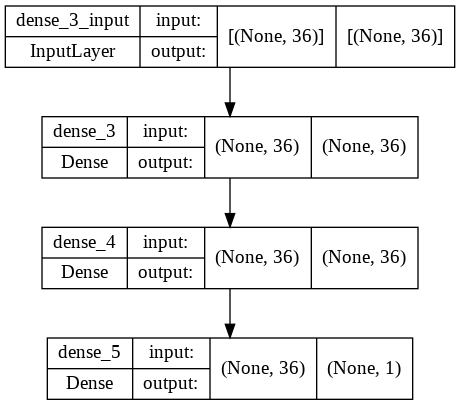

In [ ]:
from keras.utils.vis_utils import plot_model    

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

In [ ]:
something, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

32/32 [==============================] - 1s 3ms/step - loss: 0.5947 - accuracy: 0.9610
0.9610000252723694


## Second

Initializing data

creating data_frame

In [52]:
import os 

paths = list()
is_cat_list = list()

from keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
# helper function to load image and return it and input vector
def get_image(path):
    img = load_img(path, target_size=(224, 224))
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x 

for animal in ['Cat', 'Dog']:
    for image_path in os.listdir(f'../data/Adult{animal}'):
        image_path = f'../data/Adult{animal}/{image_path}'
        paths.append(image_path)
        is_cat_list.append(str(int(animal == 'Cat')))


data = pd.DataFrame({'image_path': paths, 'is_cat': is_cat_list})
data = data.sample(frac=1).reset_index(drop=True) # shuffle rows
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  2049 non-null   object
 1   is_cat      2049 non-null   object
dtypes: object(2)
memory usage: 32.1+ KB
                                         image_path is_cat
0  /content/drive/MyDrive/Учеба/ML/lab7/Dog/490.jpg      0
1  /content/drive/MyDrive/Учеба/ML/lab7/Dog/130.jpg      0
2  /content/drive/MyDrive/Учеба/ML/lab7/Cat/794.jpg      1
3  /content/drive/MyDrive/Учеба/ML/lab7/Cat/144.jpg      1
4  /content/drive/MyDrive/Учеба/ML/lab7/Dog/921.jpg      0


In [53]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, random_state=42, test_size=0.2)

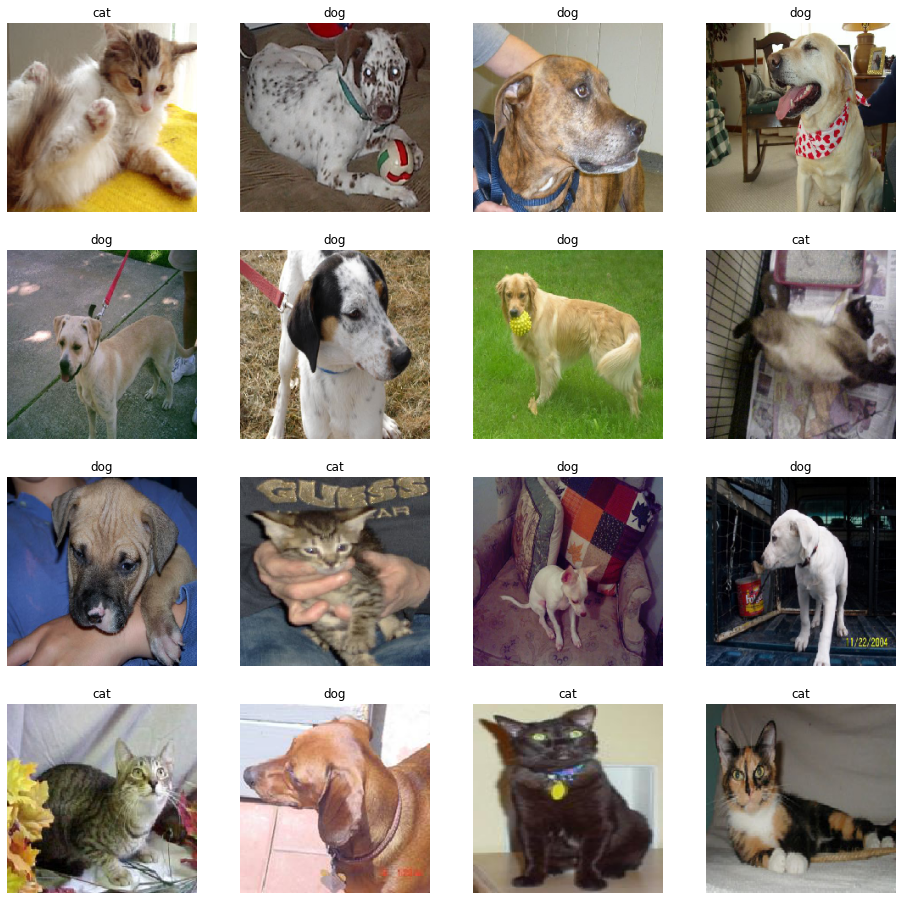

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

for i in range(0, 16):
    ax = plt.subplot(4, 4, i + 1)
    path, is_cat = data.iloc[1234 + i]
    img, array = get_image(path)
    plt.imshow(img)
    plt.title('cat' if is_cat == '1' else 'dog')
    plt.axis('off')

In [ ]:
#from keras.applications import VGG16
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from keras.layers import Dense
from keras.models import Model

input_layer = vgg16.input

new_classification_layer = Dense(1, activation='softmax')
output_layer = new_classification_layer(vgg16.layers[-2].output)

model_new = Model(input_layer, output_layer)
model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

##  Обучение

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_get = ImageDataGenerator(rescale = 1./255)

train_flow = train_gen.flow_from_dataframe(
    data_train, 
    x_col='image_path', 
    y_col='is_cat', 
    target_size=(224, 224), 
    batch_size=5, 
    class_mode='binary'
)

test_flow = test_get.flow_from_dataframe(
    data_test, 
    x_col='image_path', 
    y_col='is_cat', 
    target_size=(224, 224), 
    batch_size=5, 
    class_mode='binary'
)

history = model_new.fit(train_flow, batch_size=5,
                        epochs=5, steps_per_epoch=10)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 1638 validated image filenames belonging to 2 classes.
Found 409 validated image filenames belonging to 2 classes.
Epoch 1/5
10/10 [==============================] - 27s 3s/step - loss: 0.0000e+00 - accuracy: 0.6200
Epoch 2/5
10/10 [==============================] - 24s 2s/step - loss: 0.0000e+00 - accuracy: 0.4200
Epoch 3/5
10/10 [==============================] - 24s 2s/step - loss: 0.0000e+00 - accuracy: 0.5400
Epoch 4/5
10/10 [==============================] - 24s 2s/step - loss: 0.0000e+00 - accuracy: 0.4600
Epoch 5/5
10/10 [==============================] - 24s 2s/step - loss: 0.0000e+00 - accuracy: 0.5000


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.4),
])

Тонкая настройка

In [73]:
print(f'number of layers: {len(model_new.layers)}')

from tensorflow import keras 

# Unfreeze the base model
model_new.trainable = True
# Recompile model
model_new.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

number of layers: 23


In [74]:
model_new.fit(train_flow, epochs=5, batch_size=5, steps_per_epoch=5)

Epoch 1/5
5/5 [==============================] - 55s 10s/step - loss: 319.8707 - binary_accuracy: 0.6000
Epoch 2/5
5/5 [==============================] - 51s 10s/step - loss: 1.7303 - binary_accuracy: 0.7600
Epoch 3/5
5/5 [==============================] - 51s 10s/step - loss: 0.8155 - binary_accuracy: 0.6800
Epoch 4/5
5/5 [==============================] - 51s 10s/step - loss: 1.0401 - binary_accuracy: 0.5600
Epoch 5/5
5/5 [==============================] - 51s 10s/step - loss: 0.7265 - binary_accuracy: 0.6000
